<a href="https://colab.research.google.com/github/asluchych/introduction-econometrics/blob/main/chapter4_statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4: Prediction, Goodness-of-Fit and Modelling Issues             
# Assignment 3 

In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Read data

In [2]:
houseprices = pd.read_csv("houseprices.csv")

In [6]:
houseprices.describe().round(2)

,PRICE,SQM
count,1080.00,1080.00
mean,154863.18,216.08
std,122912.81,93.65
min,22000.00,61.50
25%,99000.00,149.06
50%,130000.00,203.13
75%,170162.50,260.13
max,1580000.00,733.65


In [ ]:
y = houseprices['PRICE']
X = houseprices['SQM']
X_const = sm.add_constant(X)

Model 1

In [12]:
lin_model = sm.OLS(y, X_const).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     1480.
Date:                Sun, 22 May 2022   Prob (F-statistic):          1.54e-204
Time:                        16:08:21   Log-Likelihood:                -13722.
No. Observations:                1080   AIC:                         2.745e+04
Df Residuals:                    1078   BIC:                         2.746e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.086e+04   6110.189     -9.961      0.000   -7.29e+04   -4.89e+04
SQM          998.3332     25.947     38.476      0.000     947.422    1049.245
==============================================================================
Omnibus:                     1185.144   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139601.187
Skew:                           5.135   Prob(JB):                         0.00
Kurtosis:                      57.743   Cond. No.                         592.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 2

In [14]:
log_y = np.log(y)
log_lin_model = sm.OLS(log_y, X_const).fit()
log_lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     1795.
Date:                Sun, 22 May 2022   Prob (F-statistic):          1.11e-231
Time:                        16:10:18   Log-Likelihood:                -305.80
No. Observations:                1080   AIC:                             615.6
Df Residuals:                    1078   BIC:                             625.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8386      0.025    440.459      0.000      10.790      10.887
SQM            0.0044      0.000     42.365      0.000       0.004       0.005
==============================================================================
Omnibus:                      227.324   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              599.250
Skew:                          -1.091   Prob(JB):                    7.49e-131
Kurtosis:                       5.926   Cond. No.                         592.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 3

In [ ]:
log_X = np.log(X)
log_X_const = sm.add_constant(log_X)

In [46]:
log_log_model = sm.OLS(log_y, log_X_const).fit()
log_log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     1666.
Date:                Sun, 22 May 2022   Prob (F-statistic):          6.01e-221
Time:                        16:29:21   Log-Likelihood:                -330.55
No. Observations:                1080   AIC:                             665.1
Df Residuals:                    1078   BIC:                             675.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4706      0.131     49.457      0.000       6.214       6.727
SQM            1.0061      0.025     40.818      0.000       0.958       1.054
==============================================================================
Omnibus:                       93.215   Durbin-Watson:                   1.405
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.319
Skew:                          -0.480   Prob(JB):                     3.57e-51
Kurtosis:                       5.059   Cond. No.                         71.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b) comparison

In [70]:
x_vals = np.linspace(20, 800, 1000)
fitted_vals_lin = lin_model.params[1]*x_vals + lin_model.params[0]
fitted_vals_log_lin = np.exp(log_lin_model.params[1]*x_vals + log_lin_model.params[0])
fitted_vals_log_log = np.exp(log_log_model.params[1]*np.log(x_vals) + log_log_model.params[0])

(i) Regression graph - scatterplot PRICE, SQM

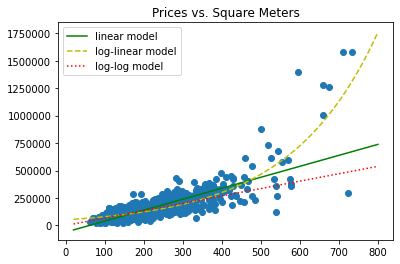

In [94]:
plt.scatter(X, y)
plt.title("Prices vs. Square Meters")
plt.ticklabel_format(style='plain')
plt.plot(x_vals, fitted_vals_lin, '-g', label = "linear model")
plt.plot(x_vals, fitted_vals_log_lin, '--y', label = "log-linear model")
plt.plot(x_vals, fitted_vals_log_log, ':r', label = "log-log model")
plt.legend(loc = "upper left")

(ii) Residuals graph

Linear model

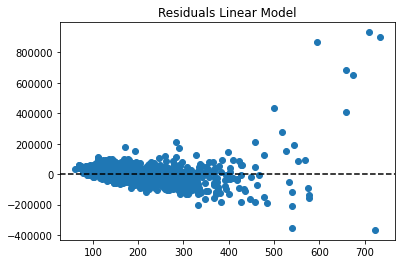

In [87]:
plt.scatter(X, lin_model.resid)
plt.title("Residuals Linear Model")
plt.axhline(y=0, color = 'k', linestyle='dashed')

Log-linear model

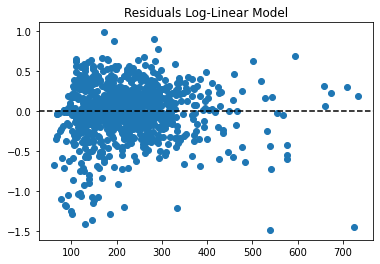

In [88]:
plt.scatter(X, log_lin_model.resid)
plt.title("Residuals Log-Linear Model")
plt.axhline(y=0, color = 'k', linestyle='dashed')

Log-log model

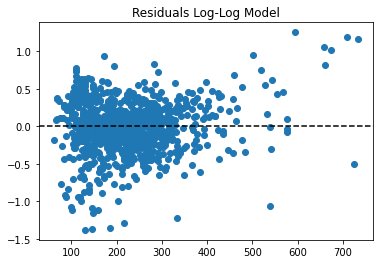

In [89]:
plt.scatter(X, log_log_model.resid)
plt.title("Residuals Log-Log Model")
plt.axhline(y=0, color = 'k', linestyle='dashed')

(iv) Jarque-Bera Test: H_0 the residuals are normally distributed

linear model

In [91]:
sm.stats.stattools.jarque_bera(lin_model.resid)

(139601.18722854377, 0.0, 5.134781081002603, 57.74289632527184)

log-linear model

In [92]:
sm.stats.stattools.jarque_bera(log_lin_model.resid)

(599.2496443344994,
 7.49191931450463e-131,
 -1.090625503117898,
 5.925543165086477)

log-log model

In [93]:
sm.stats.stattools.jarque_bera(log_log_model.resid)

(232.3190317276493,
 3.5691371748799774e-51,
 -0.480285043329909,
 5.059113949765206)